In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
data = pd.read_csv("netflixData.csv")
data.head(n=20)

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...",Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,"May 21, 2020"
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,"June 28, 2020"
7,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,When nerdy high schooler Dani finally attracts...,Fernando Lebrija,Comedies,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017.0,TV-14,99 min,5.1/10,Movie,"September 8, 2017"
8,8b34e0e9-7258-4e49-b799-2e7eddbd7e34,#Rucker50,This documentary celebrates the 50th anniversa...,Robert McCullough Jr.,"Documentaries, Sports Movies",NaN,United States,2016.0,TV-PG,56 min,5.1/10,Movie,"December 1, 2016"
9,6da2fc83-1546-4e9d-bf2e-9b472a059c18,#Selfie,"Two days before their final exams, three teen ...",Cristina Jacob,"Comedies, Dramas, International Movies","Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2014.0,TV-MA,125 min,5.8/10,Movie,"June 21, 2021"


# Show the most number of tv-shows and movies released by each country in descending order in netflix dataset shared in class. Also plot a countplot of each country.

In [3]:
data.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [4]:
data["Director"].replace(np.nan, "None",inplace=True)
data["Cast"].replace(np.nan, "None",inplace=True)
data["Production Country"].replace(np.nan, "Others",inplace=True)
data["Imdb Score"].replace(np.nan, "None",inplace=True)
data["Date Added"].replace(np.nan, "Others",inplace=True)

In [5]:
data.isnull().sum()

Show Id               0
Title                 0
Description           0
Director              0
Genres                0
Cast                  0
Production Country    0
Release Date          3
Rating                4
Duration              3
Imdb Score            0
Content Type          0
Date Added            0
dtype: int64

In [6]:
country = data.groupby("Content Type")["Production Country"].value_counts()
country

Content Type  Production Country                      
Movie         United States                               1168
              India                                        589
              Others                                       298
              United Kingdom                               103
              Spain                                         88
                                                          ... 
TV Show       United States, Poland                          1
              United States, Russia                          1
              United States, Sweden                          1
              United States, United Kingdom, Australia       1
              Uruguay, Germany                               1
Name: Production Country, Length: 592, dtype: int64

### If one column(country) contain more values to converted into Row values.

In [7]:
mm = data.drop('Production Country', axis=1).join(data['Production Country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Production Country'))

In [8]:
mm

,Show Id,Title,Description,Director,Genres,Cast,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,Production Country
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,None,Reality TV,None,2020.0,TV-MA,1 Season,6.6/10,TV Show,Others,United States
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020",South Korea
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020",Italy
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,None,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",2020.0,TV-MA,1 Season,6.6/10,TV Show,Others,United States
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",None,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020",Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"On his wedding day, an arrogant, greedy accoun...",Ahmed Nader Galal,"Comedies, Dramas, International Movies","Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...",2009.0,TV-14,115 min,7.4/10,Movie,"April 25, 2020",Egypt
5963,5bed77ab-5e31-4216-8b51-44c9a35442e6,دفعة القاهرة,A group of women leaves Kuwait to attend unive...,None,"International TV Shows, TV Dramas","Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",2019.0,TV-14,1 Season,None,TV Show,Others,Others
5964,4661ec0c-8692-4661-bc76-a96412b311fd,海的儿子,"Two brothers start a new life in Singapore, wh...",None,"International TV Shows, TV Dramas","Li Nanxing, Christopher Lee, Jesseca Liu, Appl...",2016.0,TV-14,1 Season,None,TV Show,Others,Others
5965,145c93a7-1924-403c-a933-4ede8ad66f26,반드시 잡는다,After people in his town start turning up dead...,Hong-seon Kim,"Dramas, International Movies, Thrillers",Baek Yoon-sik,2017.0,TV-MA,110 min,6.5/10,Movie,"February 28, 2018",South Korea


# Country Values by descending order

In [9]:
country1 = mm.groupby("Content Type")["Production Country"].value_counts()
country1.tail(n=100)

Content Type  Production Country
Movie         Kenya                 5
              Kuwait                5
              Portugal              5
              Ghana                 4
              Greece                4
                                   ..
TV Show       Puerto Rico           1
              Senegal               1
              Syria                 1
              Uruguay               1
              West Germany          1
Name: Production Country, Length: 100, dtype: int64

In [10]:
import seaborn as sns

<AxesSubplot:>

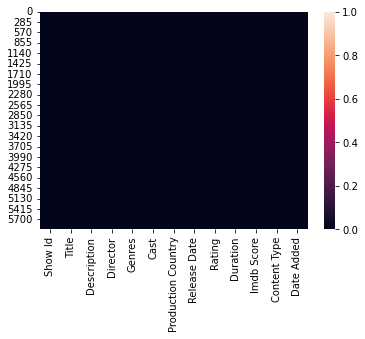

In [11]:
sns.heatmap(data.isnull())

<AxesSubplot:>

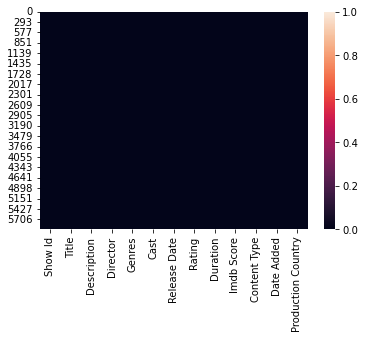

In [12]:
sns.heatmap(mm.isnull())

<AxesSubplot:xlabel='Production Country', ylabel='count'>

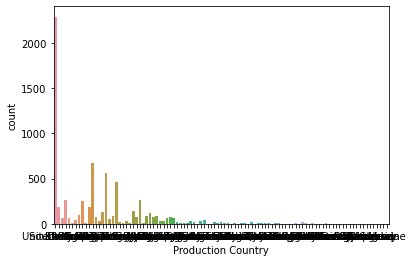

In [13]:
sns.countplot(x='Production Country', data= mm)

<AxesSubplot:xlabel='count', ylabel='Production Country'>

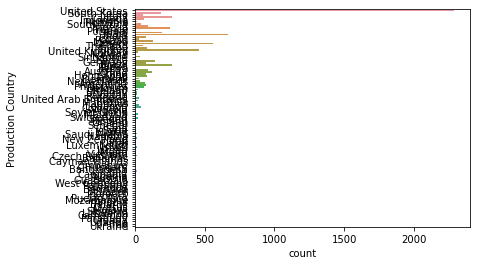

In [14]:
sns.countplot(y='Production Country', data= mm)

(1.0, 200.0)

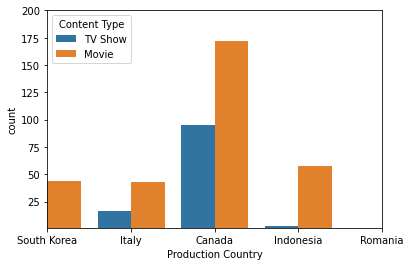

In [23]:
ax=sns.countplot(x='Production Country', data= mm,hue="Content Type")
ax.set_xlim(1,5)
ax.set_ylim(1,200)

(1.0, 20.0)

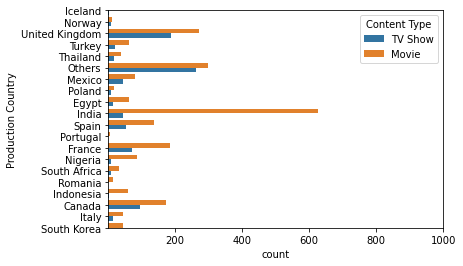

In [17]:
ax=sns.countplot(y='Production Country', data= mm,hue="Content Type")
ax.set_xlim(1,1000)
ax.set_ylim(1,20)